<a href="https://colab.research.google.com/github/febinmariya/ML-ICT/blob/main/testMLprojectDAY4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# import pandas
import pandas as pd
import numpy as np

In [5]:
from google.colab import files
files.upload()

Saving newplacement.csv to newplacement.csv


{'newplacement.csv': b'index,cgpa,package\r\n1,6.89,3.26\r\n2,5.12,1.98\r\n3,7.82,3.25\r\n4,7.42,3.67\r\n5,6.94,3.57\r\n6,7.89,2.99\r\n7,6.73,2.6\r\n8,6.75,2.48\r\n9,6.09,2.31\r\n10,8.31,3.51\r\n11,5.32,1.86\r\n12,6.61,2.6\r\n13,8.94,3.65\r\n14,6.93,2.89\r\n15,7.73,3.42\r\n16,7.25,3.23\r\n17,6.84,2.35\r\n18,5.38,2.09\r\n19,6.94,2.98\r\n20,7.48,2.83\r\n21,7.28,3.16\r\n22,6.85,2.93\r\n23,6.14,2.3\r\n24,6.19,2.48\r\n25,6.53,2.71\r\n26,7.28,3.65\r\n27,8.31,3.42\r\n28,5.42,2.16\r\n29,5.94,2.24\r\n30,7.15,3.49\r\n31,7.36,3.26\r\n32,8.1,3.89\r\n33,6.96,3.08\r\n34,6.35,2.73\r\n35,7.34,3.42\r\n36,6.87,2.87\r\n37,5.99,2.84\r\n38,5.9,2.43\r\n39,8.62,4.36\r\n40,7.43,3.33\r\n41,9.38,4.02\r\n42,6.89,2.7\r\n43,5.95,2.54\r\n44,7.66,2.76\r\n45,5.09,1.86\r\n46,7.87,3.58\r\n47,6.07,2.26\r\n48,5.84,3.26\r\n49,8.63,4.09\r\n50,8.87,4.62\r\n51,9.58,4.43\r\n52,9.26,3.79\r\n53,8.37,4.11\r\n54,6.47,2.61\r\n55,6.86,3.09\r\n56,8.2,3.39\r\n57,5.84,2.74\r\n58,6.6,1.94\r\n59,6.92,3.09\r\n60,7.56,3.31\r\n61,5.61,2.19

In [8]:
import pandas as pd

# Read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('newplacement.csv', index_col=0)

# Display the first 10 rows
data.head(10)

,cgpa,package
index,,
1,6.89,3.26
2,5.12,1.98
3,7.82,3.25
4,7.42,3.67
5,6.94,3.57
6,7.89,2.99
7,6.73,2.60
8,6.75,2.48
9,6.09,2.31


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [9]:
# display the last 5 rows
data.tail()

,cgpa,package
index,,
196,6.93,2.46
197,5.89,2.57
198,7.21,3.24
199,7.63,3.96
200,6.22,2.33


In [10]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 2)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [11]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

<Axes: xlabel='cgpa', ylabel='package'>

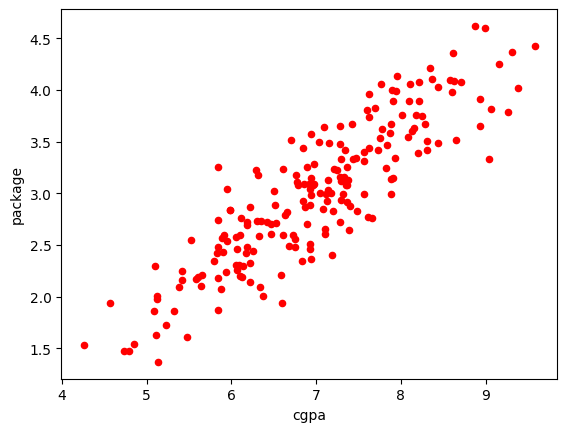

In [24]:
data.plot(kind='scatter',x='cgpa',y='package',color='red')


## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [13]:
# create a Python list of feature names
feature_cols = ['cgpa', 'package']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['cgpa','package']]

# print the first 5 rows
X.head()


,cgpa,package
index,,
1,6.89,3.26
2,5.12,1.98
3,7.82,3.25
4,7.42,3.67
5,6.94,3.57


In [14]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 2)


In [15]:
# select a Series from the DataFrame
lab = ['cgpa']

# equivalent command that works if there are no spaces in the column name
y =  data['cgpa']



# print the first 5 values
y.head()

index
1    6.89
2    5.12
3    7.82
4    7.42
5    6.94
Name: cgpa, dtype: float64

In [16]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(150, 2)
(150,)
(50, 2)
(50,)
       cgpa  package
index               
59     6.92     3.09
41     9.38     4.02
35     7.34     3.42
103    5.13     1.37
185    7.88     3.14
199    7.63     3.96
96     6.63     2.79
5      6.94     3.57
30     7.15     3.49
169    8.65     3.52
172    8.01     3.76
19     6.94     2.98
12     6.61     2.60
90     6.42     2.72
111    8.18     3.76
119    7.40     2.88
160    8.71     4.08
36     6.87     2.87
137    5.64     2.10
60     7.56     3.31
52     9.26     3.79
17     6.84     2.35
45     5.09     1.86
95     5.83     2.42
32     8.10     3.89
163    5.53     2.55
39     8.62     4.36
29     5.94     2.24
194    4.57     1.94
28     5.42     2.16
48     5.84     3.26
166    8.21     4.08
195    7.89     3.67
178    7.09     3.64
177    6.29     3.23
98     5.98     2.84
175    7.32     2.99
74     8.44     4.03
70     7.30     2.94
173    6.93     2.51
109    7.76     3.54
108    6.33     2.59
190    8.11     4.06
15     7.73     3.42
57  

## Linear regression in scikit-learn

In [19]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [20]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[6.92 9.38 7.34 5.13 7.88 7.63 6.63 6.94 7.15 8.65 8.01 6.94 6.61 6.42
 8.18 7.4  8.71 6.87 5.64 7.56 9.26 6.84 5.09 5.83 8.1  5.53 8.62 5.94
 4.57 5.42 5.84 8.21 7.89 7.09 6.29 5.98 7.32 8.44 7.3  6.93 7.76 6.33
 8.11 7.73 5.84 7.48 5.84 7.43 6.31 6.06]


We need an **evaluation metric** in order to compare our predictions with the actual values!